In [2]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

# Function to extract data from a TensorBoard log file
def extract_tensorboard_data(log_dir, tag='charts/episodic_length'):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    # Extract scalar values for a specific tag
    scalar_data = event_acc.Scalars(tag)
    # Separate into steps and values
    steps = np.array([x.step for x in scalar_data])
    values = np.array([x.value for x in scalar_data])
    return steps, values

def get_learning_curve_data(model_name, env_name, tag='charts/episodic_length'):
    run_pattern = f"C:/Users/24401/CBRL/runs/{env_name}__{model_name}__*/"
    run_list = glob.glob(run_pattern)

    all_steps = []
    all_values = []

    for log_dir in run_list:
        steps, values = extract_tensorboard_data(log_dir, tag=tag)
        all_steps.append(steps)
        all_values.append(values)

    # Define a common step range based on the minimum and maximum of all steps
    common_steps = np.linspace(min(min(s) for s in all_steps), max(max(s) for s in all_steps), num=1000)

    # Interpolate values for each run to align on common steps
    all_interpolated_values = [np.interp(common_steps, steps, values) for steps, values in zip(all_steps, all_values)]
    all_interpolated_values = np.array(all_interpolated_values)  # Shape: (num_runs, len(common_steps))

    median_values = np.median(all_interpolated_values, axis=0)
    max_values = np.max(all_interpolated_values, axis=0)
    min_values = np.min(all_interpolated_values, axis=0)
    mean_values = np.mean(all_interpolated_values, axis=0)
    std_dev_values = np.std(all_interpolated_values, axis=0)

    return common_steps, mean_values, std_dev_values, median_values, max_values, min_values

def plot_learning_curve(common_steps, mean_values, std_dev_values, color='orange'):
    plt.figure(figsize=(10, 6))

    # Plot the mean episode length
    plt.plot(common_steps, mean_values, color=color, label='Average')

    # Plot the standard deviation as a shaded area
    plt.fill_between(common_steps, mean_values - std_dev_values, mean_values + std_dev_values, color=color, alpha=0.3, label='Standard Deviation')

    # Labels and legend
    plt.xlabel("Global Step")
    plt.ylabel("Episode Length")
    plt.title("Learning Curve with Average Episode Length and Standard Deviation")
    plt.legend()
    plt.grid()
    plt.show()

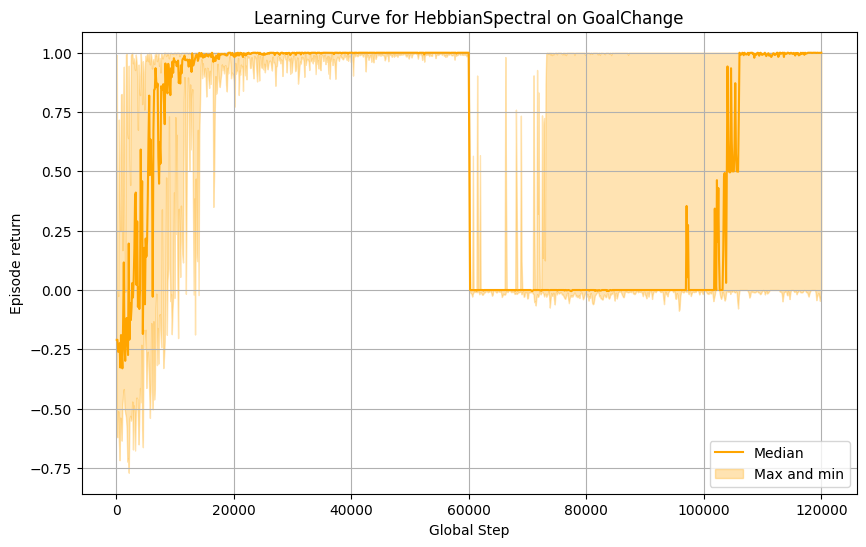

In [3]:
model_name = 'HebbianSpectral'
env_name = 'GoalChange'
tag = 'episodic_return'

common_steps, mean_values, std_dev_values, median_values, max_values, min_values = get_learning_curve_data(model_name, env_name, tag=f'charts/{tag}')

plt.figure(figsize=(10, 6))

# plt.plot(common_steps, mean_values, color='orange', label='Average')
# plt.fill_between(common_steps, mean_values - std_dev_values, mean_values + std_dev_values, color='orange', alpha=0.3, label='Standard Deviation')

plt.plot(common_steps, median_values, color='orange', label='Median')
plt.fill_between(common_steps, min_values, max_values, color='orange', alpha=0.3, label='Max and min')

# Labels and legend
plt.xlabel("Global Step")
plt.ylabel("Episode return")
plt.title(f"Learning Curve for {model_name} on {env_name}")
plt.legend()
plt.grid()
plt.savefig(rf"C:\Users\24401\CBRL\figures\{env_name}_{model_name}_{tag}.png", format='png', dpi=300, bbox_inches="tight")

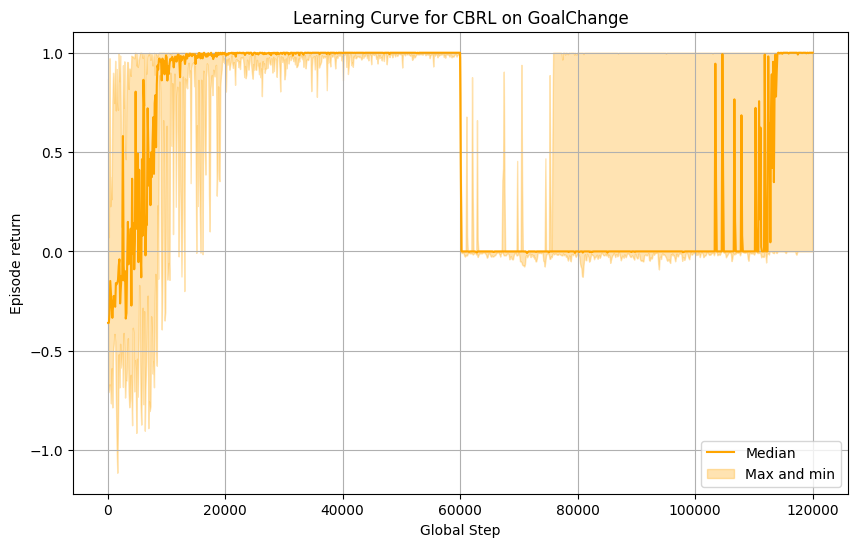

In [4]:
model_name = 'CBRL'
env_name = 'GoalChange'
tag = 'episodic_return'

common_steps, mean_values, std_dev_values, median_values, max_values, min_values = get_learning_curve_data(model_name, env_name, tag=f'charts/{tag}')

plt.figure(figsize=(10, 6))

# plt.plot(common_steps, mean_values, color='orange', label='Average')
# plt.fill_between(common_steps, mean_values - std_dev_values, mean_values + std_dev_values, color='orange', alpha=0.3, label='Standard Deviation')

plt.plot(common_steps, median_values, color='orange', label='Median')
plt.fill_between(common_steps, min_values, max_values, color='orange', alpha=0.3, label='Max and min')

# Labels and legend
plt.xlabel("Global Step")
plt.ylabel("Episode return")
plt.title(f"Learning Curve for {model_name} on {env_name}")
plt.legend()
plt.grid()
plt.savefig(rf"C:\Users\24401\CBRL\figures\{env_name}_{model_name}_{tag}.png", format='png', dpi=300, bbox_inches="tight")